In [40]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
import  matplotlib.pyplot as plt

In [11]:
mnist = fetch_openml("mnist_784")

In [21]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
data , target = shuffle(mnist.data, mnist.target)

In [91]:
data = data[:10000]
target = target[:10000]

In [92]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
57689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


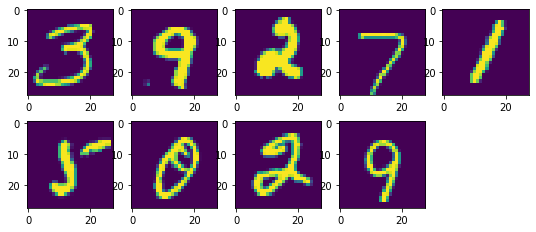

In [145]:
plt.figure(figsize=(9, 10))

for i in range(9):
    plt.subplot(int('55'+ str(i+1)))
    plt.imshow(data.iloc[i].values.reshape(28,28))

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [119]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [120]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [121]:
y_predict = knn_clf.predict(X_test)

/home/ashkan/Documents/MachineLearning1/venv/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [122]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       0.71      1.00      0.83        24
           2       0.91      0.71      0.80        28
           3       0.84      0.90      0.87        29
           4       0.69      0.69      0.69        16
           5       0.96      0.88      0.92        26
           6       0.91      0.94      0.93        33
           7       0.88      0.91      0.90        33
           8       0.93      0.61      0.74        23
           9       0.71      0.67      0.69        18

    accuracy                           0.84       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.85      0.84      0.84       250



In [123]:
confusion_matrix(y_test, y_predict)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2, 20,  0,  3,  0,  0,  1,  1,  0],
       [ 0,  1,  1, 26,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  5],
       [ 0,  1,  0,  1,  0, 23,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  2,  1,  2,  1,  0,  2,  1, 14,  0],
       [ 1,  0,  0,  2,  1,  0,  0,  2,  0, 12]])